In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Downloads/phiusiil+phishing+url+dataset.zip")



In [178]:

print("Dataset shape:", df.shape)


Dataset shape: (235795, 56)


In [180]:


print("First 5 rows:")
df.head()


First 5 rows:


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [182]:
print("\nSummary statistics:")
print(df.describe())


print("\nMissing values per column:")
print(df.isnull().sum())




Summary statistics:
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.59

In [184]:
df.dropna()


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [186]:
print(df['label'].value_counts())




label
1    134850
0    100945
Name: count, dtype: int64


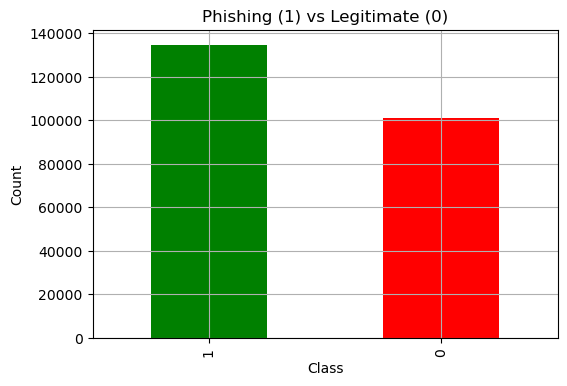

In [188]:


plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Phishing (1) vs Legitimate (0)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid()
plt.show()

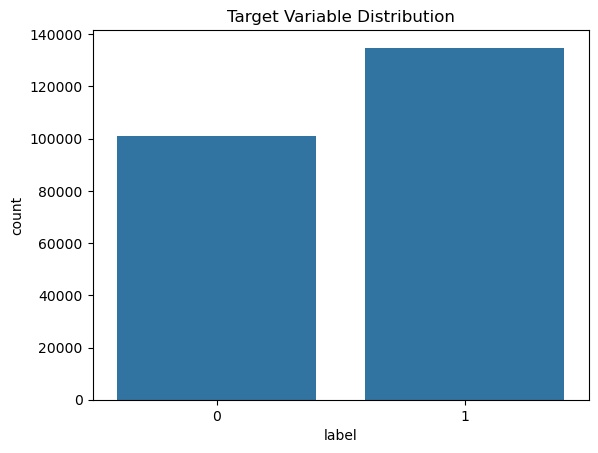

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Target Variable Distribution')
plt.show()


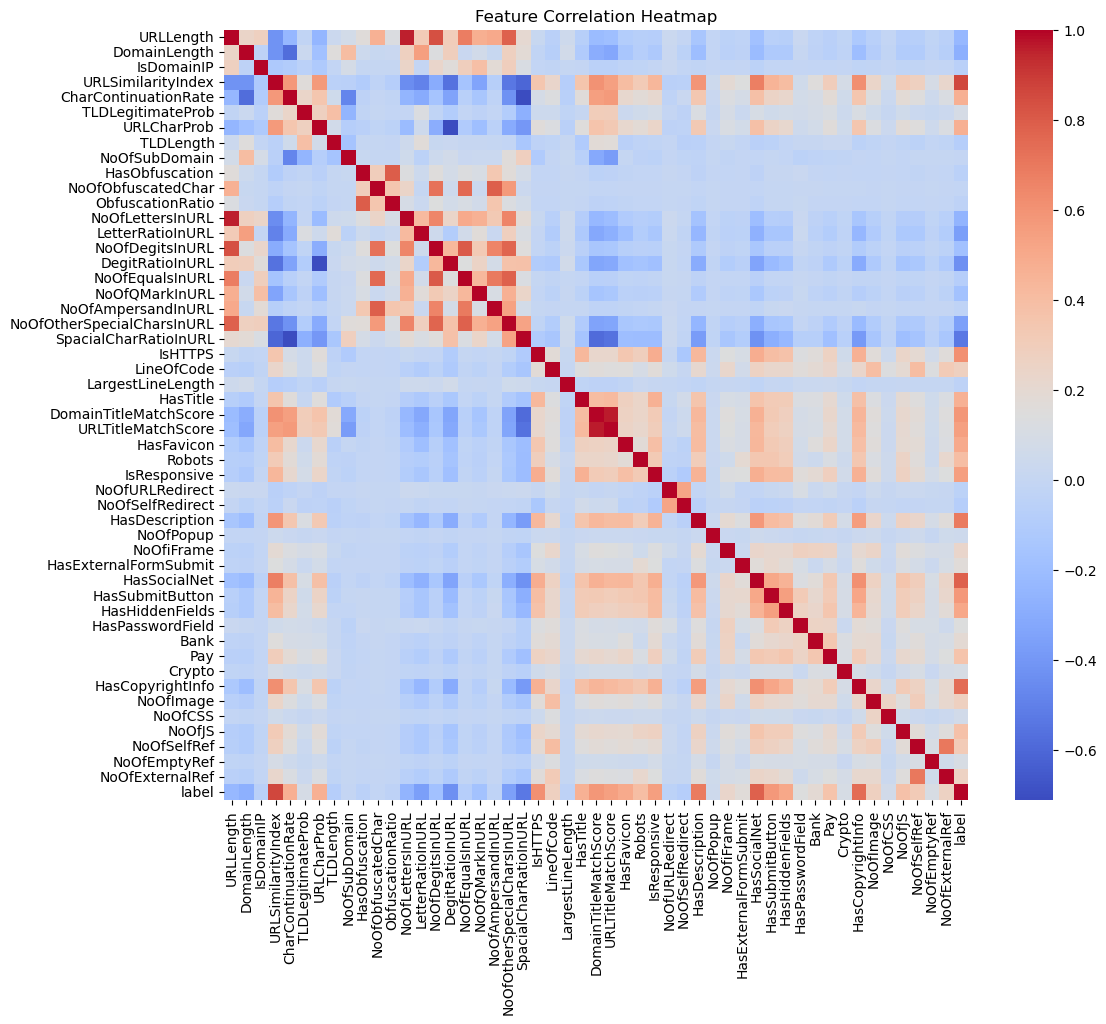

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [14]:

numeric_df = df.select_dtypes(include=[np.number])


corr_target = numeric_df.corr()['label'].sort_values(ascending=False)

print(corr_target)


label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

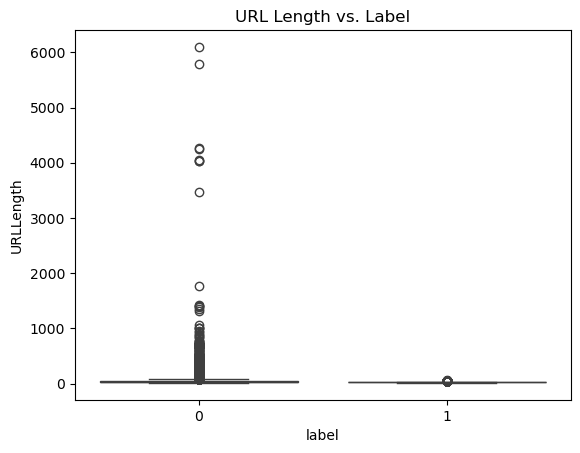

In [16]:
sns.boxplot(x='label', y='URLLength', data=df)
plt.title('URL Length vs. Label')
plt.show()


In [190]:
df.head

<bound method NDFrame.head of            FILENAME                                                URL  \
0        521848.txt                   https://www.southbankmosaics.com   
1         31372.txt                           https://www.uni-mainz.de   
2        597387.txt                     https://www.voicefmradio.co.uk   
3        554095.txt                        https://www.sfnmjournal.com   
4        151578.txt                 https://www.rewildingargentina.org   
...             ...                                                ...   
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
0          

In [197]:
print(df.columns)


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

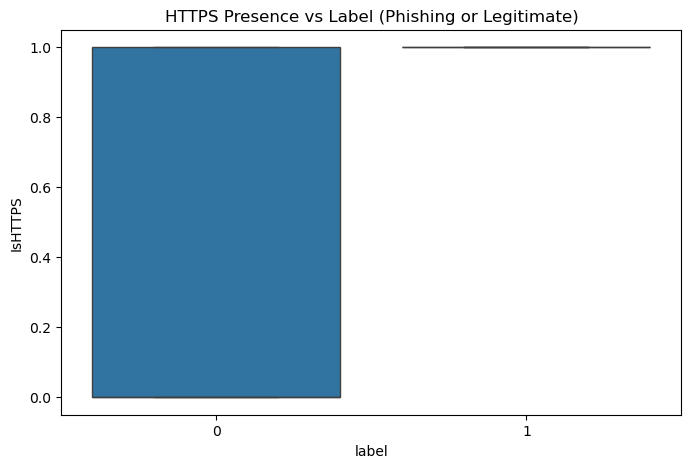

In [212]:

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='IsHTTPS', data=df)
plt.title('HTTPS Presence vs Label (Phishing or Legitimate)')
plt.show()


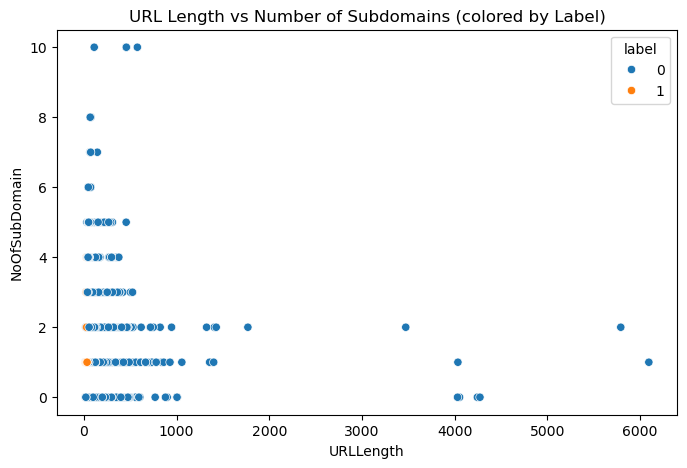

In [214]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='URLLength', y='NoOfSubDomain', hue='label', data=df)
plt.title('URL Length vs Number of Subdomains (colored by Label)')
plt.show()



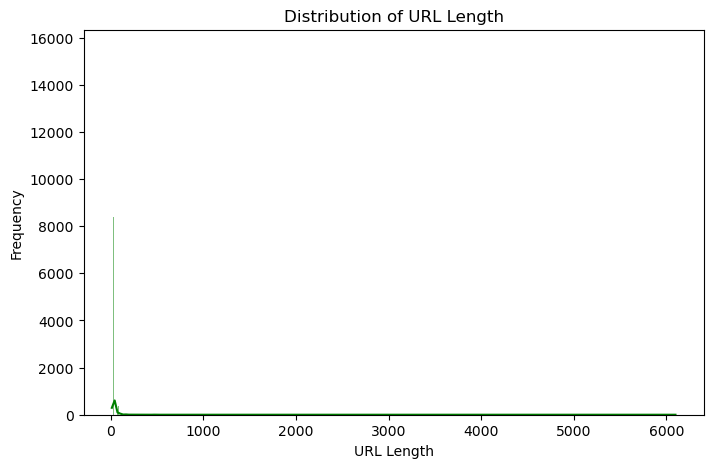

In [217]:
plt.figure(figsize=(8,5))
sns.histplot(df['URLLength'], kde=True, color='green')
plt.title('Distribution of URL Length')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()



In [227]:

# Selectnumeric column
numeric_df = df.select_dtypes(include=['int64', 'float64'])

print(numeric_df.skew())


URLLength                      53.321737
DomainLength                    2.513397
IsDomainIP                     19.146593
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
HasObfuscation                 21.981435
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
IsHTTPS                        -1.370443
LineOfCode                     53.072297
LargestLineLength              48.179926
HasTitle        

In [225]:
skewness = numeric_df.skew().sort_values(ascending=False)
print(skewness)


NoOfCSS                       464.404031
NoOfObfuscatedChar            204.684335
NoOfJS                        140.435761
NoOfEqualsInURL               114.985479
NoOfEmptyRef                  106.826225
NoOfAmpersandInURL            106.717256
NoOfiFrame                     97.677347
NoOfDegitsInURL                94.877574
NoOfPopup                      84.952694
NoOfExternalRef                65.900247
NoOfSelfRef                    60.381378
NoOfLettersInURL               58.402581
URLLength                      53.321737
LineOfCode                     53.072297
LargestLineLength              48.179926
NoOfOtherSpecialCharsInURL     47.428522
ObfuscationRatio               40.118612
NoOfImage                      28.230253
HasObfuscation                 21.981435
IsDomainIP                     19.146593
NoOfQMarkInURL                  8.160618
Crypto                          6.294860
NoOfSelfRedirect                4.687797
HasExternalFormSubmit           4.447479
DegitRatioInURL 

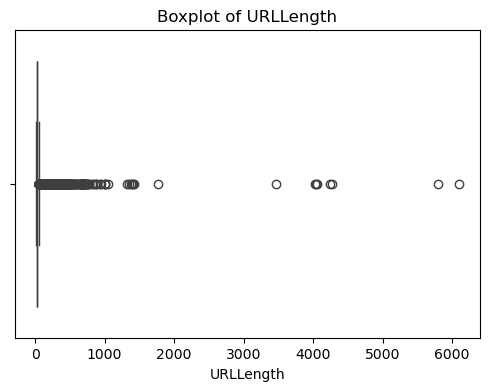

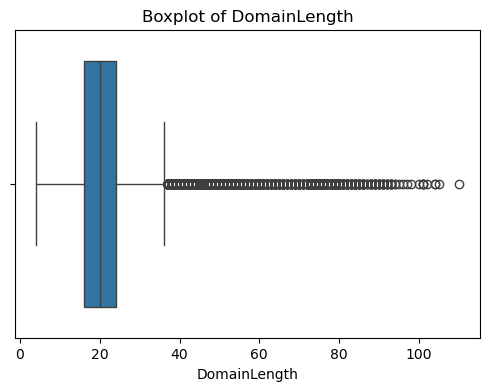

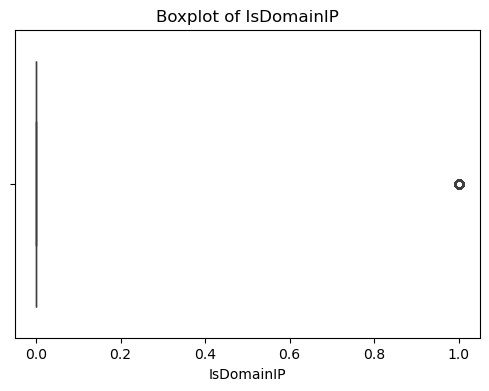

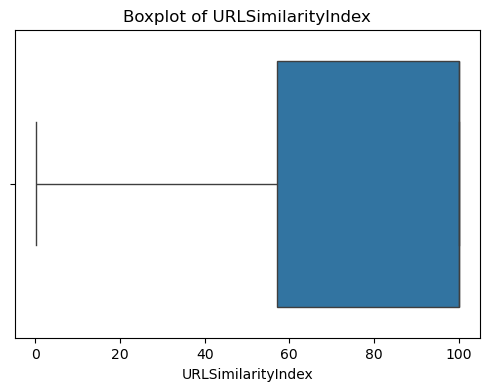

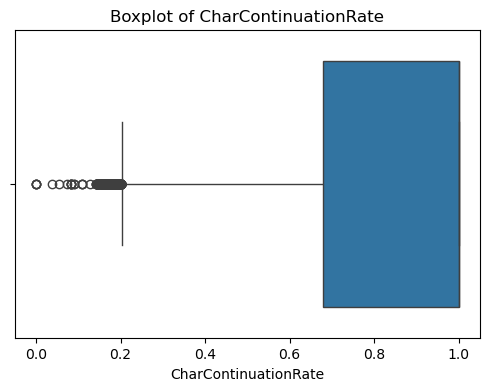

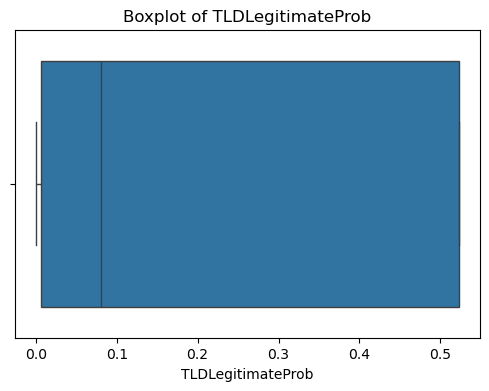

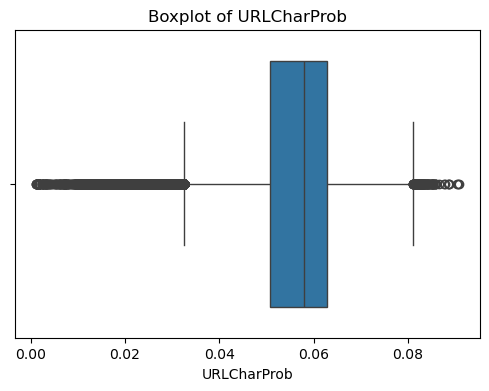

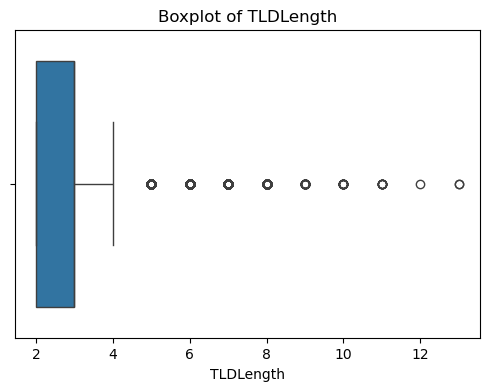

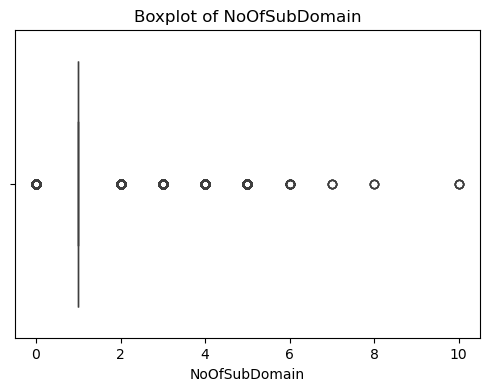

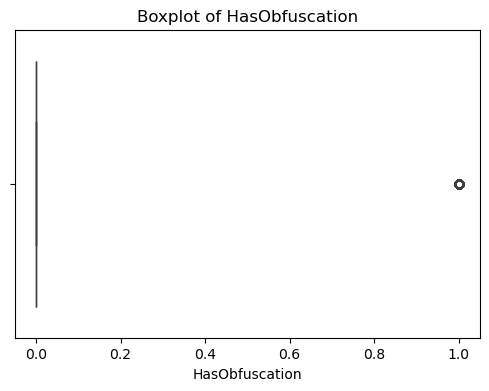

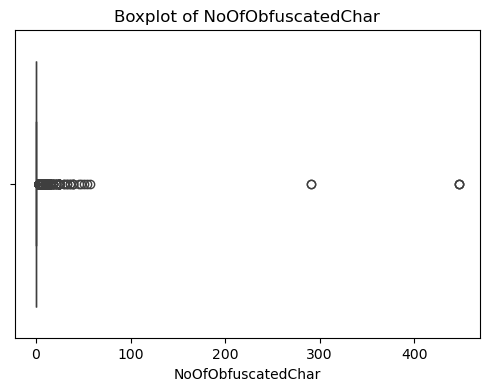

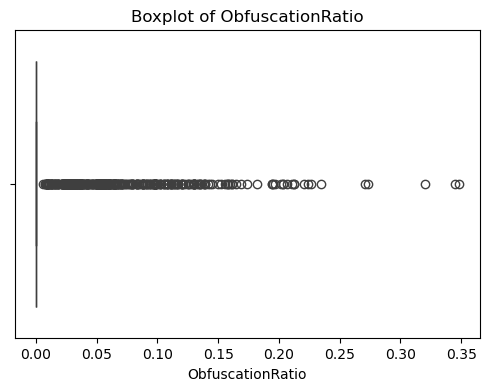

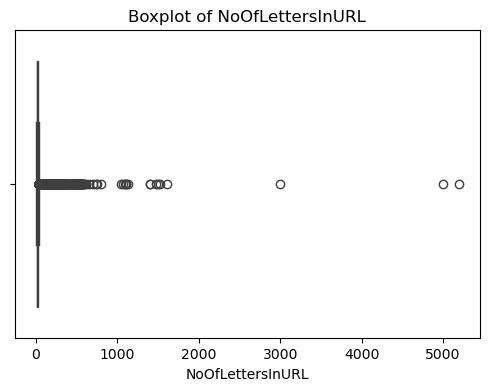

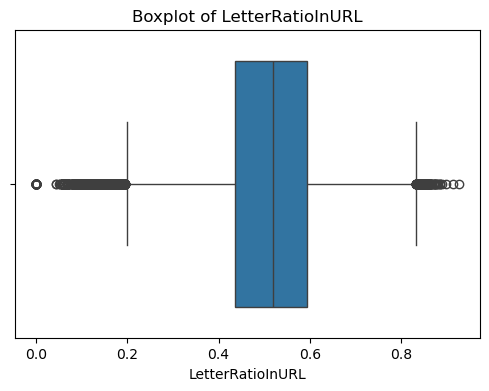

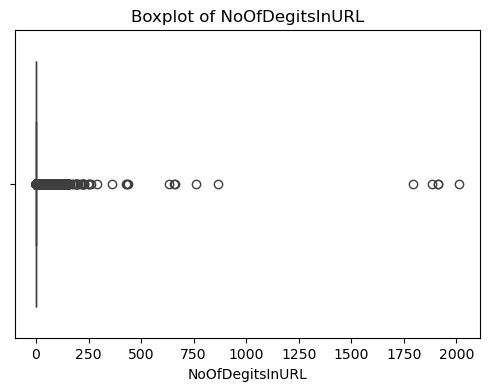

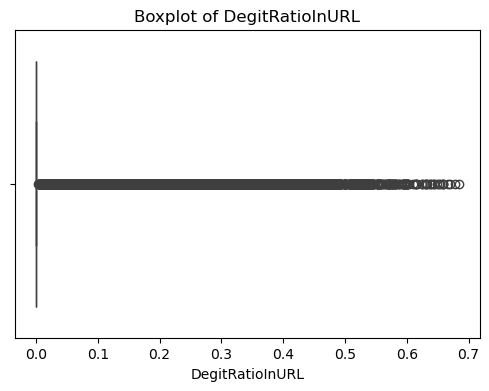

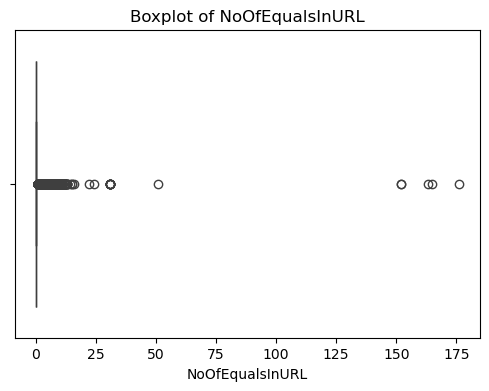

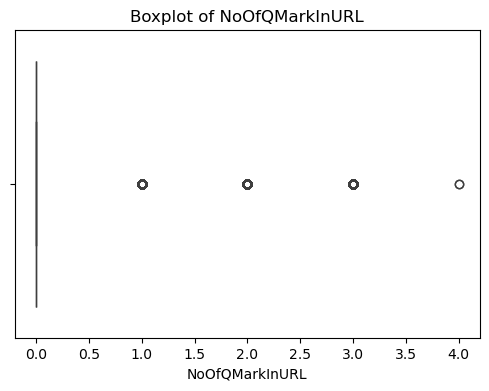

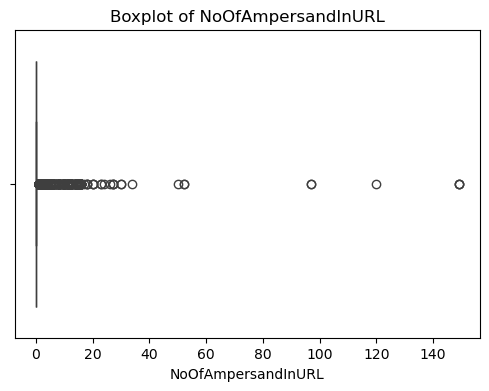

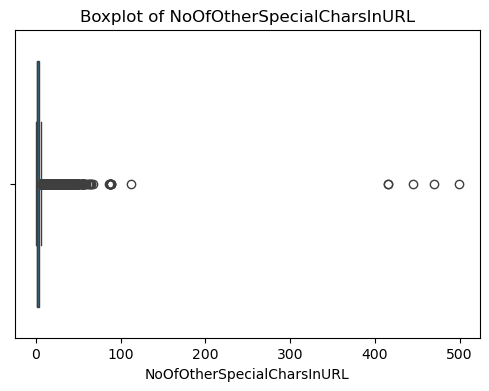

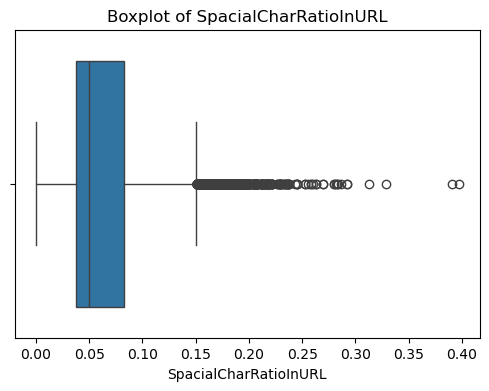

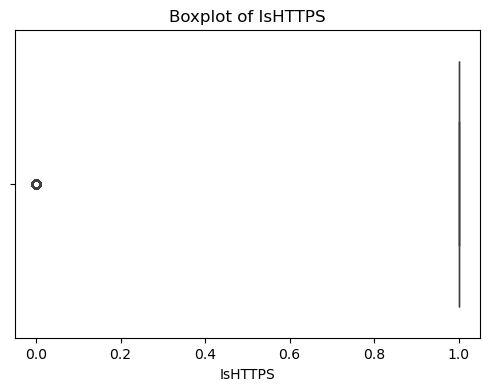

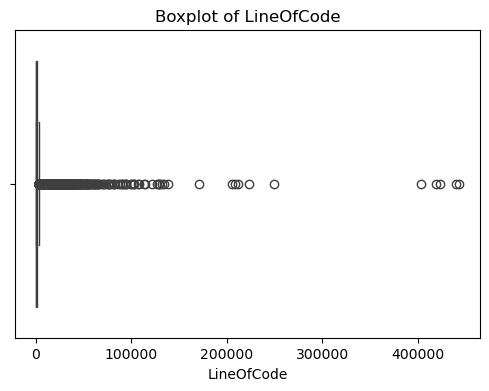

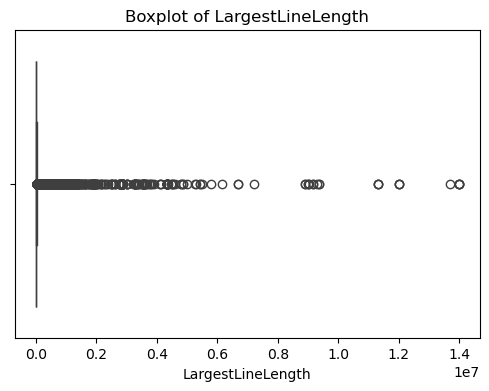

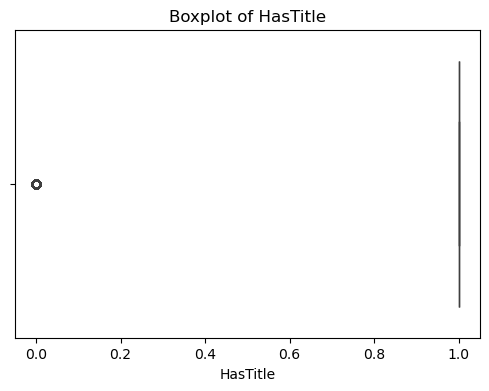

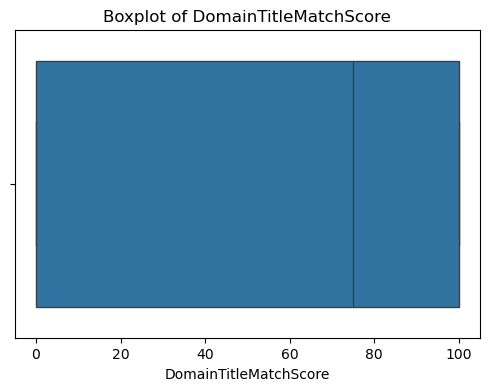

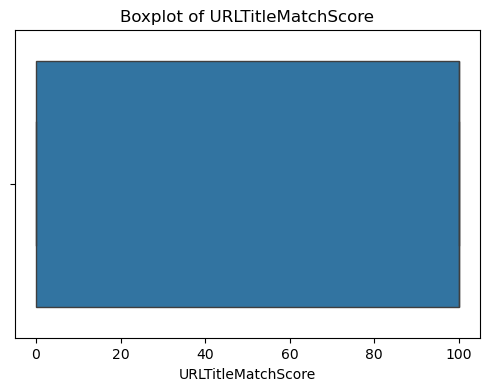

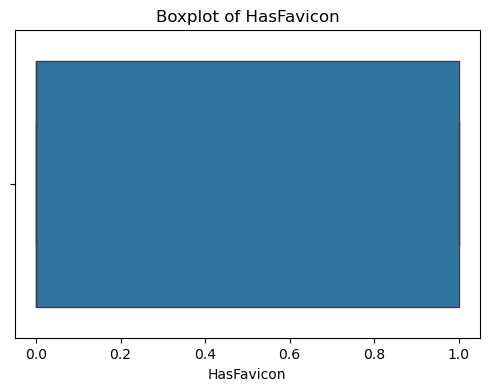

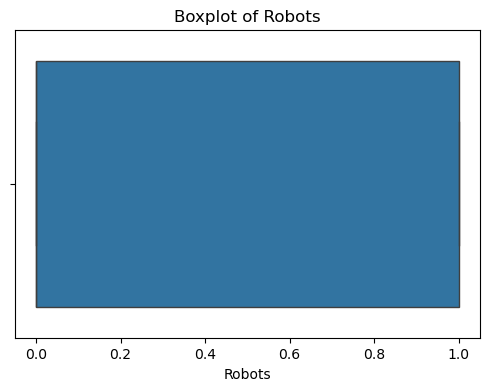

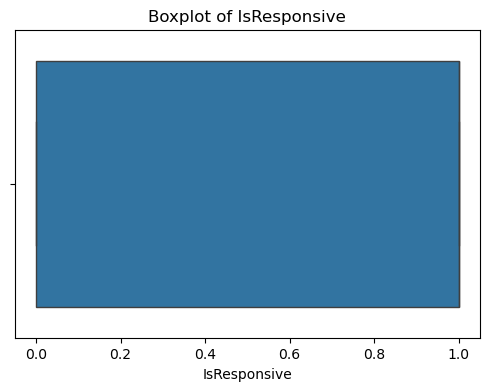

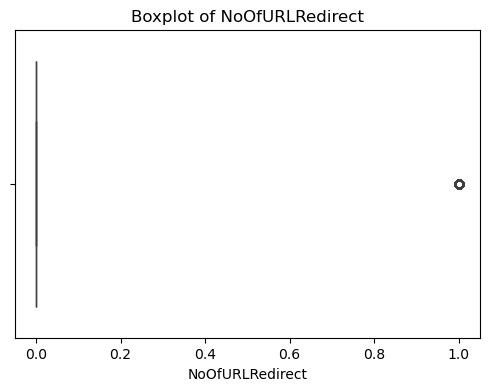

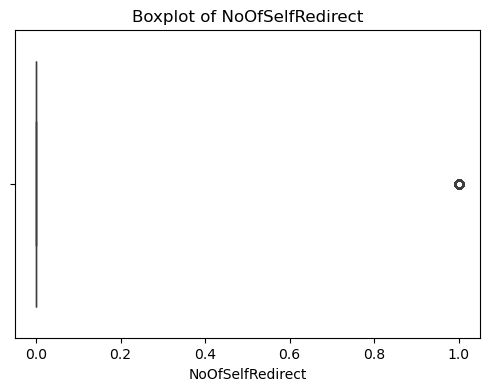

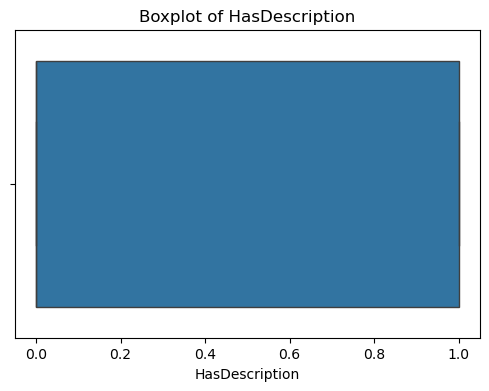

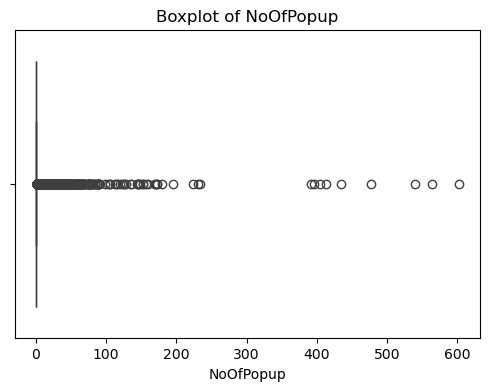

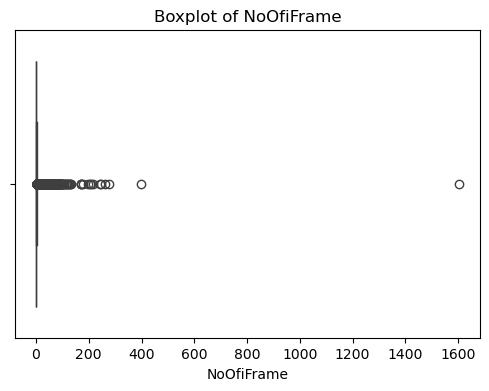

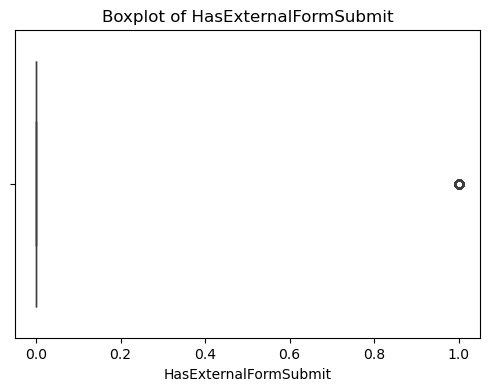

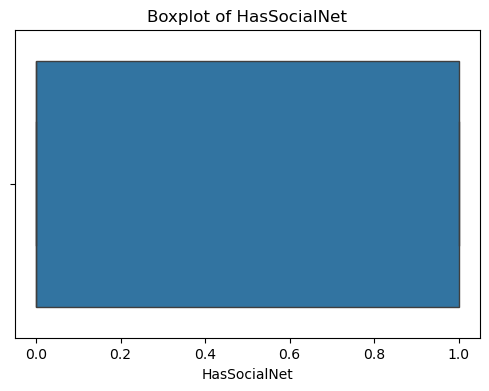

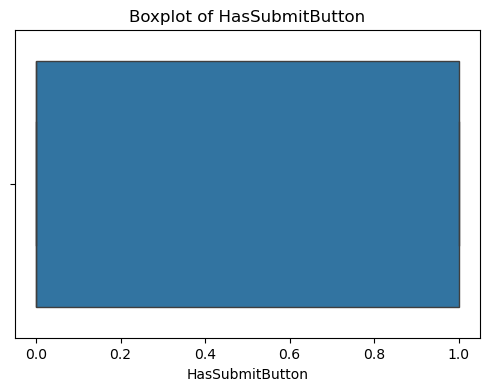

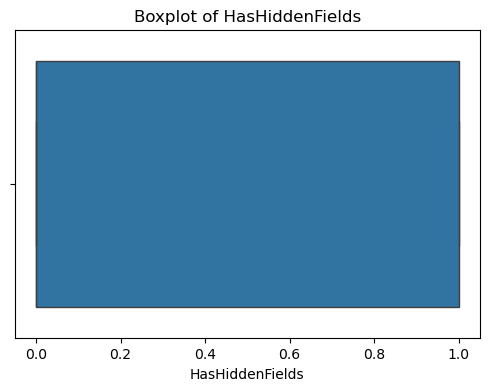

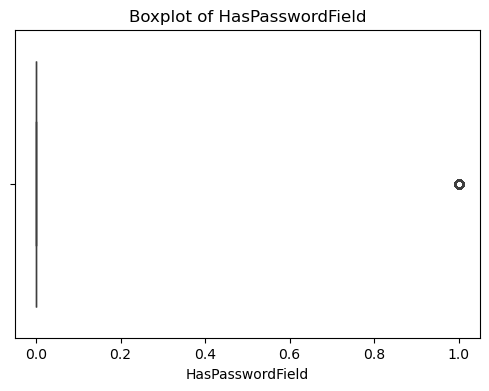

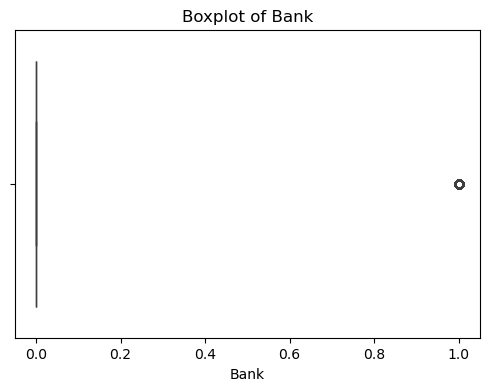

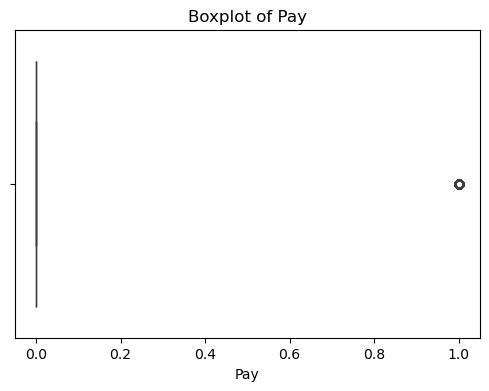

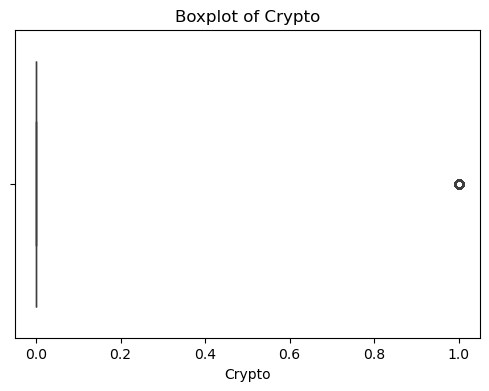

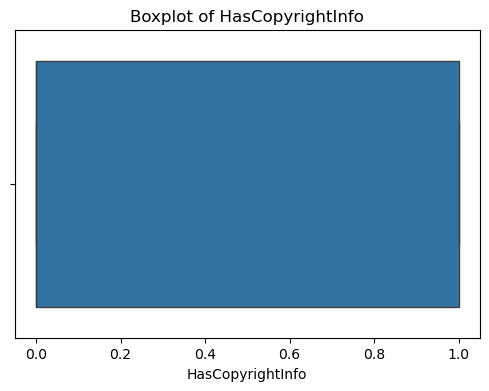

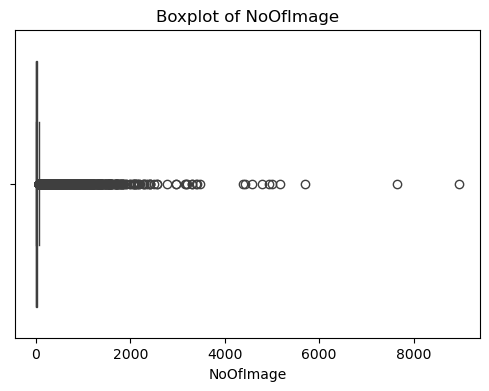

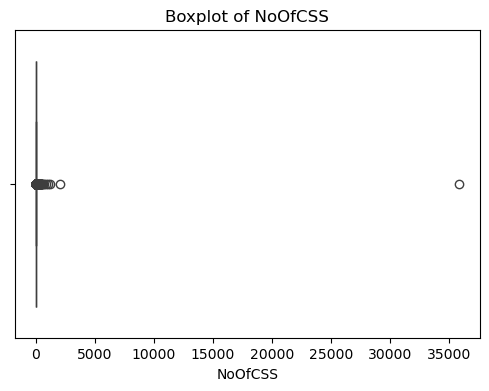

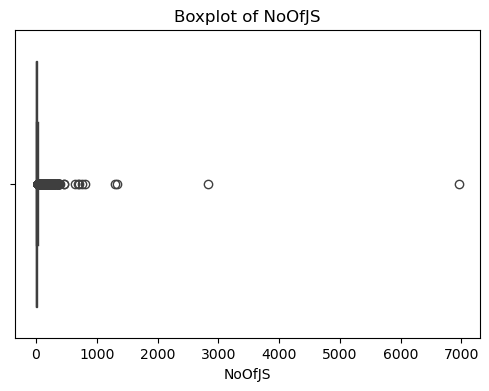

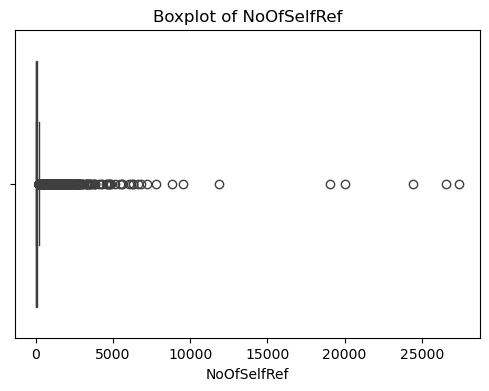

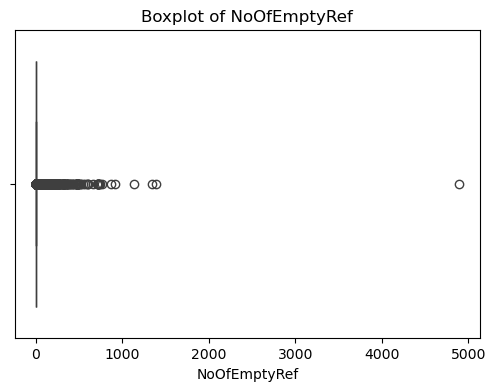

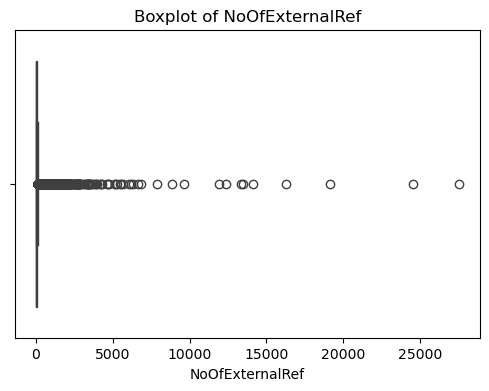

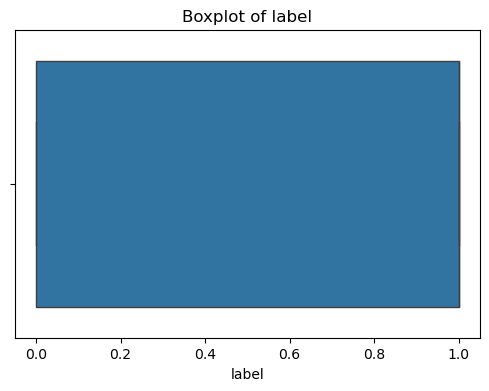

In [229]:

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
